# EmployeeSQL Bonus

### Evidence that this is a fictional dataset:

* One might suspect that administrative staff don't on average make more than managers and engineers, even when the latter classes of employee make a significant portion of their total compensation through performance bonuses.  That said, it's not clear whether the staff and senior staff categories might include the finance, accounting, and corporate development functions, which do tend to receive significantly higher compensation than say secretarial staff.

* Similarly, it makes virtually no sense that assistant engineers, full engineers, senior engineers, and technique leaders should receive approximately the same salary compensation even if they make a significant portion of their total compensation through performance bonuses.

* Further, there seems to be a whole missing class of employee: pure sales, sales engineers (who might be classed as engineers), marketing, and business development.

* One super important data point is that the number of employees clustered around the $40,000 take home level is so much much higher than adjacent compensation levels.  In fact, between 5x-6x the next multiple rungs down.  This concentration at the low-end of the wage scale could reflect either (1) hyper-accelerated hiring for the bulk of the 15-year period (very unlikely) or (2) a super high rate rate of attrition (the usual for healthy tech companies is 10%, and 20% if not doing great; this salary frequency concentration seems way off the scale).  If this were even remotely a legitimate data set, one would have expected a less steep drop off of salary amount frequencies.

* Yet another major point of evidence is that salaries are fixed in place for all employees for the entire period.  Who doesn't get a raise with tenure and good execution, especially in a large, competitive technology company?  Or doesn't get a change in compensation if they shift departments?  Often successful engineers who have managerial talent get promoted to manager, often coming with a raise.  This seems especially incongruous when there are over 50,000 unique values for salary.

* Lastly, the emp_no 499942 is an after-the-fact dead give-away.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
# Configure SQLalchemy database import
# VERY IMPORTANT: we needed to pip and import psycopg2 lower-level database access tool/library to be able to use SQLalchemy

# Elements to configure the SQLalchemy database import tool
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
dbname = 'pewlett_hackard'

# Execute configuration of SQLalchemy database import tool
engine = create_engine(f'postgres://{user}:{password}@{host}:{port}/{dbname}')
engine = engine.connect()
conn = engine.connect()

In [3]:
# Create dataframes for each of the EmployeeSQL database tables 
#    using the SQLalchemy library for connection and reading
departments_df = pd.read_sql('SELECT * FROM departments', conn)
dept_emp_df = pd.read_sql('SELECT * FROM dept_emp', conn)
dept_manager_df = pd.read_sql('SELECT * FROM dept_manager', conn)
employees_df = pd.read_sql('SELECT * FROM employees', conn)
salaries_df = pd.read_sql('SELECT * FROM salaries', conn)
titles_df = pd.read_sql('SELECT * FROM titles', conn)

### Examine the tables from the EmployeeSQL database as dataframes

In [4]:
print(f"Rows in Table departments = {len(departments_df)}")
departments_df.head()

Rows in Table departments = 9


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [5]:
print(f"Rows in Table dept_emp = {('{:,}'.format(len(dept_emp_df)))}")
dept_emp_df.head()

Rows in Table dept_emp = 331,603


,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
print(f"Rows in Table dept_manager = {len(dept_manager_df)}")
dept_manager_df.head()

Rows in Table dept_manager = 24


,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [7]:
print(f"Rows in Table employees = {('{:,}'.format(len(employees_df)))}")
employees_df.rename(columns = {'emp_title_id':'title_id'}, inplace = True) 
employees_df.head()

Rows in Table employees = 300,024


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [8]:
print(f"Rows in Table salaries = {('{:,}'.format(len(salaries_df)))}")
salaries_df.head()

Rows in Table salaries = 300,024


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [9]:
print(f"Rows in Table titles = {len(titles_df)}")
titles_df.head()

Rows in Table titles = 7


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [10]:
# Calculate the number of unique values for individual salary for the entire 16-year period
# It is not surprising for a huge tech company; so why then is there no employee who experiences a raise for the period? 
len(salaries_df["salary"].unique())

50355

In [11]:
# Calculate the number of employee numbers that have more than one salary amount for the entire 16-year period
duplicate = salaries_df[salaries_df.duplicated("emp_no")] 
len(duplicate)

0

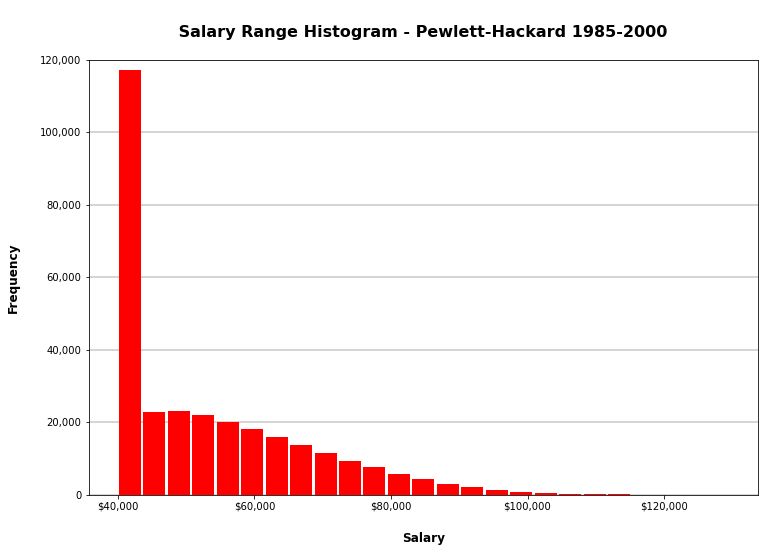

In [12]:
# Plot histogram of Salary Range in 25 bins for the entire 16-year period
ax = salaries_df.hist(column='salary', bins=25, grid=False, figsize=(12,8), color='red', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Set the limits on the y-axis
    x.set_ylim(0, 120000)
    
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='solid', alpha=0.4, color='#777777', zorder=1)

    # Set title
    x.set_title(f"\n Salary Range Histogram - Pewlett-Hackard 1985-2000 \n", weight='bold', size=16)

    # Set x- and y-axis labels
    x.set_xlabel("Salary", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

    # Format x- and y-axis labels
    x.xaxis.set_major_formatter(StrMethodFormatter('${x:,g}'))
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [13]:
# Merge 3 dataframes/SQLtables to be able to plot Average Salary by Employee Title
df1 = pd.merge(employees_df, titles_df, on="title_id")
df2 = pd.merge(df1, salaries_df, on="emp_no")
df2.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016


In [14]:
# Perform Groupby and calculate average salary by employee title
avg_salary_by_title = df2.groupby("title")["salary"].mean()
avg_salary_by_title_df = pd.DataFrame(avg_salary_by_title).reset_index()
avg_salary_by_title_df.rename(columns = {'title':'Employee Title', 'salary':'Average Salary'}, inplace = True) 
avg_salary_by_title_df

,Employee Title,Average Salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


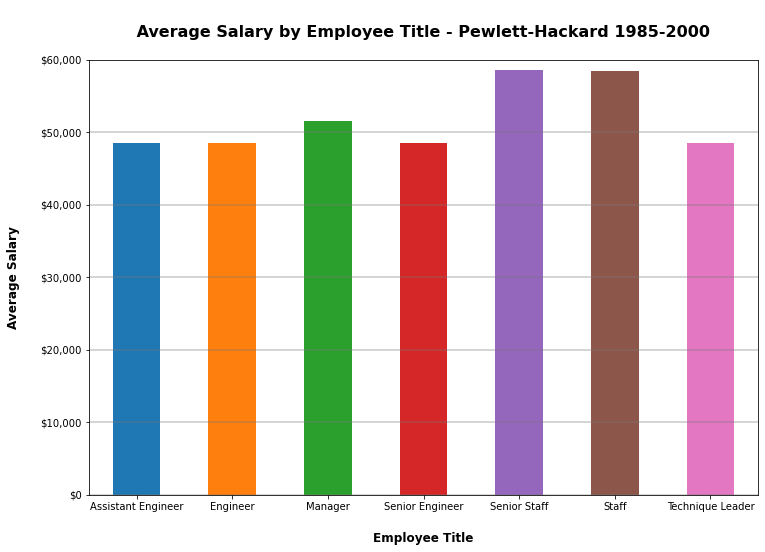

In [15]:
# Plot bar graph of Average Salary by Employee Title for the 16 year period
ax = avg_salary_by_title_df.plot.bar(x='Employee Title',
                                     y='Average Salary',
                                     legend=None,
                                     rot=0,
                                     grid=False,
                                     color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
                                     alpha=1.0,
                                     zorder=2,
                                     figsize=(12,8))

# Set the limits on the y-axis
ax.set_ylim(0, 60000)

# Draw horizontal axis lines
vals = np.arange(0, 60000, 10000)
for tick in vals:
    ax.axhline(y=tick, linestyle='solid', alpha=0.4, color='#777777') #, zorder=1)

# Set title
ax.set_title(f"\n Average Salary by Employee Title - Pewlett-Hackard 1985-2000 \n", weight='bold', size=16)

# Set x- and y-axis labels
ax.set_xlabel("Employee Title", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Average Salary", labelpad=20, weight='bold', size=12)

# Format y-axis labels
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,g}'))

In [16]:
# Looking up the employee number provided by the manager
employees_df.loc[employees_df['emp_no'] == 499942]

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


In [17]:
# Calculate the earliest and latest employee hire dates
earliest_hire_date = employees_df["hire_date"].min()
latest_hire_date = employees_df["hire_date"].max()

print(f"Earliest Hire Date = {earliest_hire_date}")
print(f"Latest Hire Date = {latest_hire_date}")

Earliest Hire Date = 1985-01-01
Latest Hire Date = 2000-01-28
